In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("NYC_property_sales.csv")
data = df

In [3]:
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Bronx,Bathgate,01 One Family Dwellings,1,3030,62,A1,4463 Park Avenue,NaN,10457.0,1,0,1,1578,1470,1899,1,A1,455000,2018-11-28T00:00:00Z
1,Bronx,Bathgate,01 One Family Dwellings,1,3030,70,A1,4445 Park Avenue,NaN,10457.0,1,0,1,1694,1497,1899,1,A1,388500,2019-07-23T00:00:00Z
2,Bronx,Bathgate,01 One Family Dwellings,1,3039,63,A1,469 E 185th St,NaN,10458.0,1,0,1,1650,1296,1910,1,A1,419000,2018-12-20T00:00:00Z
3,Bronx,Bathgate,01 One Family Dwellings,1,3043,55,A1,1948 Bathgate Avenue,NaN,10457.0,1,0,1,2356,2047,1901,1,A1,470000,2019-03-08T00:00:00Z
4,Bronx,Bathgate,01 One Family Dwellings,1,3046,35,A1,2083 Bathgate Avenue,NaN,10457.0,1,0,1,2050,1560,1899,1,A1,445000,2018-12-17T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38172,Staten Island,Woodrow,02 Two Family Dwellings,1,7349,35,B9,33 Quail Lane,NaN,10309.0,2,0,2,2255,2377,1998,1,B9,640000,2019-03-08T00:00:00Z
38173,Staten Island,Woodrow,02 Two Family Dwellings,1,7351,22,B2,22 Herrick Avenue,NaN,10309.0,2,0,2,4000,2400,2000,1,B2,917000,2019-03-01T00:00:00Z
38174,Staten Island,Woodrow,02 Two Family Dwellings,1,7355,68,B9,62 Ambassador La,NaN,10309.0,2,0,2,2340,2160,2001,1,B9,610000,2019-08-06T00:00:00Z
38175,Staten Island,Woodrow,02 Two Family Dwellings,1,7355,85,B9,104 Ambassador Lane,NaN,10309.0,2,0,2,2730,2565,2001,1,B9,625000,2019-07-30T00:00:00Z


In [40]:
df.isnull().sum()


borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

In [5]:
df.dtypes

borough                            object
neighborhood                       object
building_class_category            object
tax_class_at_present               object
block                               int64
lot                                 int64
building_class_at_present          object
address                            object
apartment_number                   object
zip_code                          float64
residential_units                   int64
commercial_units                    int64
total_units                         int64
land_square_feet                    int64
gross_square_feet                   int64
year_built                          int64
tax_class_at_time_of_sale           int64
building_class_at_time_of_sale     object
sale_price                          int64
sale_date                          object
dtype: object

In [39]:


df.dropna(subset=['apartment_number', 'zip_code'], inplace=True)  # Replace with your list of columns


In [7]:
df.describe()


,block,lot,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price
count,12059.000000,12059.000000,12059.000000,12059.000000,12059.000000,12059.000000,12059.000000,1.205900e+04,12059.000000,12059.000000,1.205900e+04
mean,2422.877353,1302.583879,10623.597894,0.235177,0.004644,0.239821,79.193880,1.945226e+03,1587.808442,2.124637,3.270529e+06
std,2540.193439,669.086343,598.934742,2.750187,0.094526,2.770668,777.503128,1.841801e+04,794.353525,0.670794,2.531920e+07
min,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000,1.004000e+04
25%,840.000000,1038.000000,10019.000000,0.000000,0.000000,0.000000,0.000000,6.880000e+02,1910.000000,2.000000,5.800000e+05
50%,1423.000000,1130.000000,10462.000000,0.000000,0.000000,0.000000,0.000000,9.450000e+02,1987.000000,2.000000,9.670000e+05
75%,3263.000000,1312.000000,11221.000000,0.000000,0.000000,0.000000,0.000000,1.373000e+03,2014.000000,2.000000,1.900000e+06
max,16237.000000,9109.000000,11694.000000,107.000000,4.000000,107.000000,28284.000000,1.181963e+06,2019.000000,4.000000,2.155000e+09


# 1. Distribution of Sale Price (Histogram)

<ipython-input-8-eb2dfdb7a28a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sale_price'])


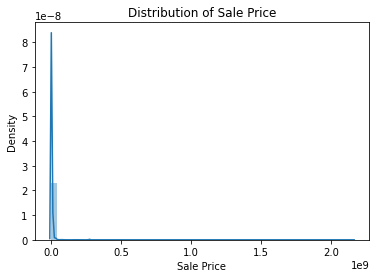

In [8]:
sns.distplot(df['sale_price'])
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Distribution of Sale Price')
plt.show()

Inference: The distribution of sale prices might be skewed, with more properties towards the lower end.

# 2. Relationship Between Sale Price and Year Built (Scatter Plot)


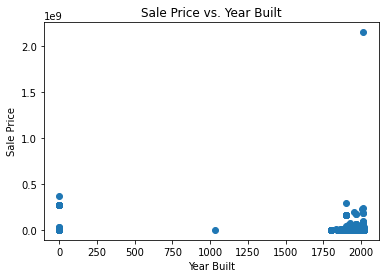

In [9]:
plt.scatter(df['year_built'], df['sale_price'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Year Built')
plt.show()

#  3.Barplot of Residential Units by Borough


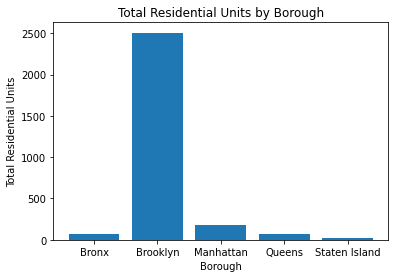

In [10]:
residential_units_by_borough = data.groupby('borough')['residential_units'].sum()
plt.bar(residential_units_by_borough.index, residential_units_by_borough.values)
plt.xlabel('Borough')
plt.ylabel('Total Residential Units')
plt.title('Total Residential Units by Borough')
plt.show()

# 4 Sale Price by Tax Class (Bar Plot)

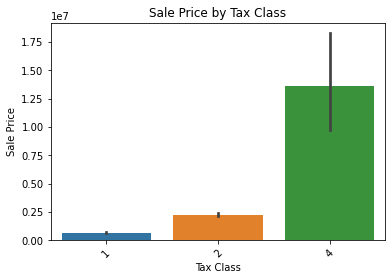

In [11]:
sns.barplot(x="tax_class_at_time_of_sale", y="sale_price", data=df)
plt.xlabel('Tax Class')
plt.ylabel('Sale Price')
plt.title('Sale Price by Tax Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

# 5. Distribution of Land vs. Gross Square Footage (Scatter Plot)

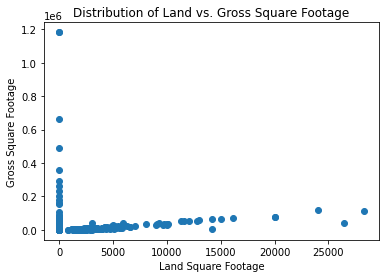

In [12]:
plt.scatter(df['land_square_feet'], df['gross_square_feet'])
plt.xlabel('Land Square Footage')
plt.ylabel('Gross Square Footage')
plt.title('Distribution of Land vs. Gross Square Footage')
plt.show()

# 6. Boxplot of Gross Square Feet by Building Class Category


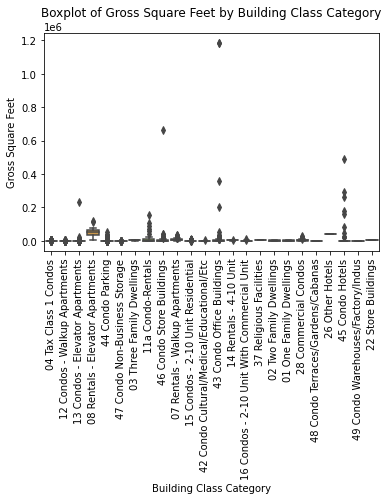

In [13]:
sns.boxplot(x='building_class_category', y='gross_square_feet', data=data)
plt.xlabel('Building Class Category')
plt.ylabel('Gross Square Feet')
plt.title('Boxplot of Gross Square Feet by Building Class Category')
plt.xticks(rotation=90)
plt.show()


#  7. Barplot of Commercial Units by Borough


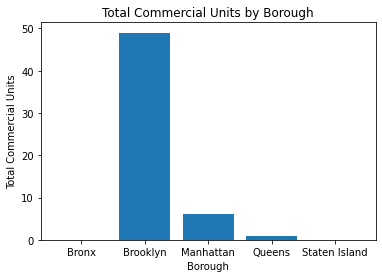

In [14]:
commercial_units_by_borough = data.groupby('borough')['commercial_units'].sum()
plt.bar(commercial_units_by_borough.index, commercial_units_by_borough.values)
plt.xlabel('Borough')
plt.ylabel('Total Commercial Units')
plt.title('Total Commercial Units by Borough')
plt.show()



# # 8. Sale Price by Zip Code (Grouped Bar Plot) - assuming enough unique zip codes


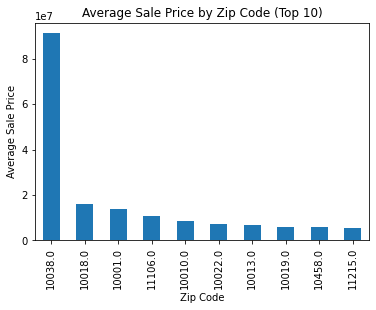

In [15]:

zip_code_groups = df.groupby('zip_code')['sale_price'].mean()
top_n_zip_codes = 10
zip_code_groups_filtered = zip_code_groups.nlargest(top_n_zip_codes)
zip_code_groups_filtered.plot(kind='bar')
plt.xlabel('Zip Code')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Zip Code (Top {})'.format(top_n_zip_codes))
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()



#  9.Barplot of Residential vs. Commercial Units by Borough


In [16]:
data = df


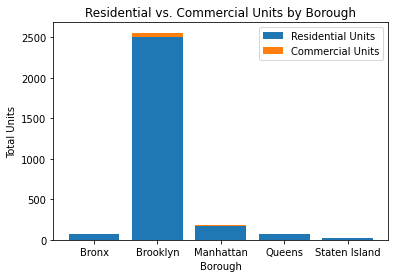

In [17]:
residential_units_by_borough = data.groupby('borough')['residential_units'].sum()
commercial_units_by_borough = data.groupby('borough')['commercial_units'].sum()

plt.bar(residential_units_by_borough.index, residential_units_by_borough.values, label='Residential Units')
plt.bar(commercial_units_by_borough.index, commercial_units_by_borough.values, bottom=residential_units_by_borough.values, label='Commercial Units')

plt.xlabel('Borough')
plt.ylabel('Total Units')
plt.title('Residential vs. Commercial Units by Borough')
plt.legend()
plt.show()


#  10 Violin Plot of Sale Price by Building Class at Time of Sale


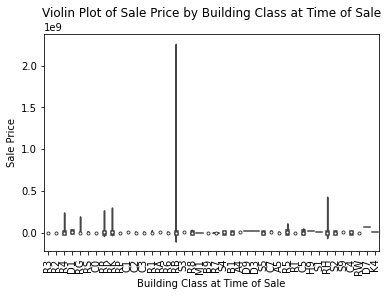

In [18]:
sns.violinplot(x='building_class_at_time_of_sale', y='sale_price', data=data)
plt.xlabel('Building Class at Time of Sale')
plt.ylabel('Sale Price')
plt.title('Violin Plot of Sale Price by Building Class at Time of Sale')
plt.xticks(rotation=90)
plt.show()


 #  11 Line Plot of Sale Price Over Time (Sale Date)


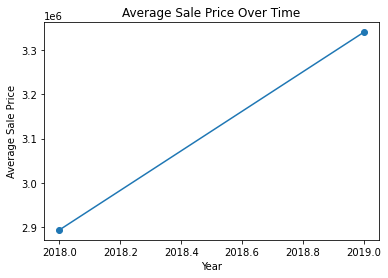

In [19]:
data['sale_date'] = pd.to_datetime(data['sale_date'])
sales_over_time = data.groupby(data['sale_date'].dt.year)['sale_price'].mean()
plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price Over Time')
plt.show()


#  12 Pie Chart of Distribution of Tax Class at Present


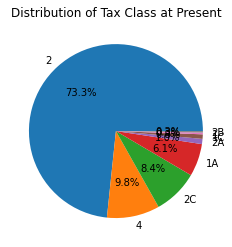

In [20]:
tax_class_distribution = data['tax_class_at_present'].value_counts()
plt.pie(tax_class_distribution, labels=tax_class_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Tax Class at Present')
plt.show()


# 13 Barplot of Average Sale Price by Building Class Category



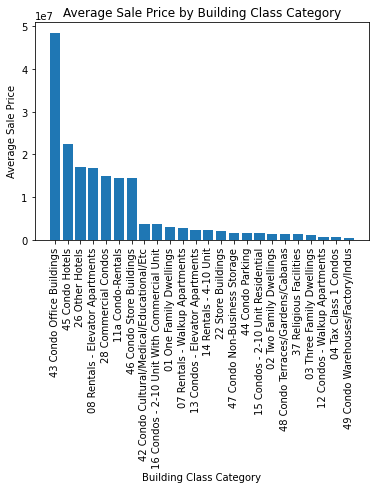

In [21]:
avg_sale_price_by_class = data.groupby('building_class_category')['sale_price'].mean().sort_values(ascending=False)
plt.bar(avg_sale_price_by_class.index, avg_sale_price_by_class.values)
plt.xlabel('Building Class Category')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Building Class Category')
plt.xticks(rotation=90)
plt.show()


# 14 Pairplot of Numeric Features


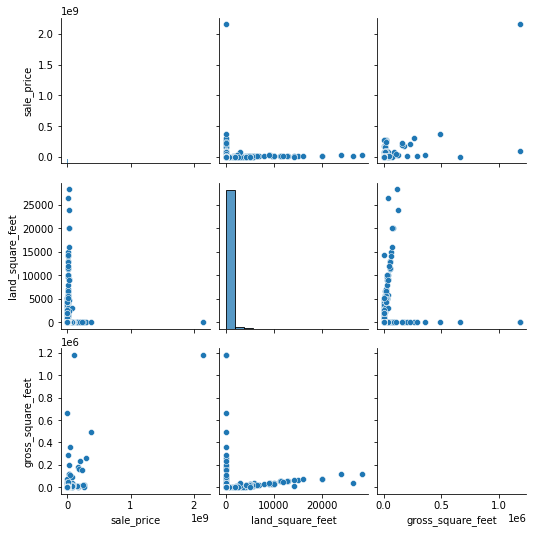

In [77]:
sns.pairplot(data[['sale_price', 'land_square_feet', 'gross_square_feet']])
plt.show()


# STATISTICAL METHODS

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Load the dataset
data = pd.read_csv('NYC_property_sales.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Linear Regression
# Define independent variables (features)
X = data[['block', 'lot', 'residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built']]
# Add constant term
X = sm.add_constant(X)
# Define dependent variable
y = data['sale_price']
# Fit the model
model = sm.OLS(y, X).fit()
# Print model summary
print("Linear Regression Model Summary:")
print(model.summary())
print("\n")






Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     919.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:00:16   Log-Likelihood:            -2.2010e+05
No. Observations:               12059   AIC:                         4.402e+05
Df Residuals:                   12051   BIC:                         4.403e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const

In [23]:
# Correlation Analysis
# Exclude non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                              block       lot  zip_code  residential_units   
block                      1.000000  0.001939  0.554192           0.051072  \
lot                        0.001939  1.000000 -0.148825          -0.161722   
zip_code                   0.554192 -0.148825  1.000000           0.070978   
residential_units          0.051072 -0.161722  0.070978           1.000000   
commercial_units           0.007023 -0.093934  0.038440           0.200288   
total_units                0.050934 -0.163731  0.071765           0.999441   
land_square_feet           0.059147 -0.192810  0.090276           0.889217   
gross_square_feet         -0.019712 -0.009671 -0.028009           0.142475   
year_built                -0.032538 -0.176564  0.027233           0.036341   
tax_class_at_time_of_sale -0.024578 -0.005458  0.032472          -0.019576   
sale_price                -0.070258 -0.017747 -0.078543           0.021318   

                           commercial_units

In [24]:

# ANOVA (Analysis of Variance)
# Example: Comparing sale prices across different boroughs
boroughs = data['borough'].unique()
sale_prices_by_borough = [data[data['borough'] == b]['sale_price'] for b in boroughs]
# Perform ANOVA
anova_results = stats.f_oneway(*sale_prices_by_borough)
# Print ANOVA results
print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)
print("\n")

ANOVA Results:
F-statistic: 22.974566470961054
p-value: 6.146520535419228e-19




In [25]:
# Chi-square Test
# Example: Assessing the association between building class category and tax class at present
# Create a contingency table
contingency_table = pd.crosstab(data['building_class_category'], data['tax_class_at_present'])
# Perform chi-square test
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
# Print chi-square test results
print("Chi-square Test Results:")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square Test Results:
Chi-square statistic: 57518.873001183056
p-value: 0.0


# ML/DL MODELS

In [26]:
import pandas as pd

# Read the dataset
df = pd.read_csv("NYC_property_sales.csv")

# Select categorical columns for one-hot encoding
categorical_columns = ['borough', 'apartment_number','neighborhood','address', 'building_class_category', 'building_class_at_present', 'building_class_at_time_of_sale']

# Perform one-hot encoding
encoded_data = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded data
print(encoded_data.head())



  tax_class_at_present  block  lot  zip_code  residential_units   
0                    1   3030   62   10457.0                  1  \
1                    1   3030   70   10457.0                  1   
2                    1   3039   63   10458.0                  1   
3                    1   3043   55   10457.0                  1   
4                    1   3046   35   10457.0                  1   

   commercial_units  total_units  land_square_feet  gross_square_feet   
0                 0            1              1578               1470  \
1                 0            1              1694               1497   
2                 0            1              1650               1296   
3                 0            1              2356               2047   
4                 0            1              2050               1560   

   year_built  ...  building_class_at_time_of_sale_S4   
0        1899  ...                              False  \
1        1899  ...                          

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


# Define categorical and numerical features
categorical_features = ['borough', 'building_class_category', 'tax_class_at_present',
                        'building_class_at_time_of_sale', 'tax_class_at_time_of_sale', 'zip_code']
numeric_features = ['land_square_feet', 'gross_square_feet', 'year_built', 'total_units',
                    'residential_units', 'commercial_units']

# Select target variable
target = 'sale_price'

# Separate features and target variable
X = df[categorical_features + numeric_features]
y = df[target]

# Preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply different preprocessing to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define RandomForestRegressor model within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best mean squared error:", -grid_search.best_score_)

# Evaluate the model's performance on a holdout test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test Mean Squared Error:", mse)
